In [9]:
import time
import matplotlib.pyplot as plt
from classifier import (
    loadData, 
    predictSex,
    evalAccuracy,
    ROCCUrve,
)
from pathlib import Path

dataset_path = Path("../data/preprocessed_dataset.csv")
gender_table_path = Path("../data/gender_table.csv")

## Chargement du dataset pré-traité

In [10]:
df = loadData(dataset_path)
gender_table = loadData(gender_table_path)

## Distribution des sexes

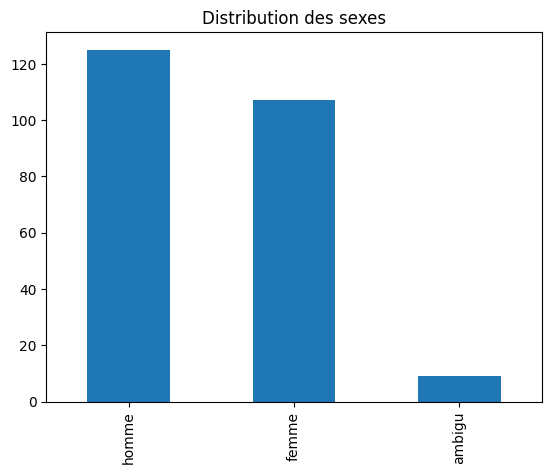

In [11]:
# Histogram of the sex distribution in df
df['sex'].value_counts().plot(kind='bar', title="Distribution des sexes")
plt.savefig("distribution_sexe.png", bbox_inches="tight")

## Expérimentation

In [12]:
df = loadData(dataset_path)
gender_table = loadData(gender_table_path)

# Prédiction
start = time.process_time()
df_pred = predictSex(df, gender_table)
end = time.process_time()

# Evaluation de la prédiction
accuracy, error_dict = evalAccuracy(df_pred)
print(f"Accuracy finale={accuracy*100:.2f}%")
print(f"Temps d'exécution={end-start:.2f}s")

Accuracy finale=94.61%
Temps d'exécution=0.86s


## Courbe ROC
En faisant excluant les individus catégorisés comme ambigus, on se retrouve dans un problème de classification binaire où l'on peut tracer la courbe ROC :

AUC=0.98


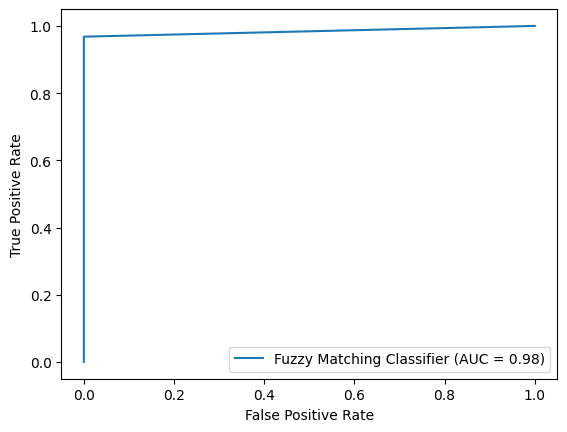

In [13]:
auc, display = ROCCUrve(df_pred)
print(f"AUC={auc:.2f}")
display.plot()
display.figure_.savefig("ROC_curve.png", bbox_inches="tight")

On affiche maintenant les erreurs de classification:

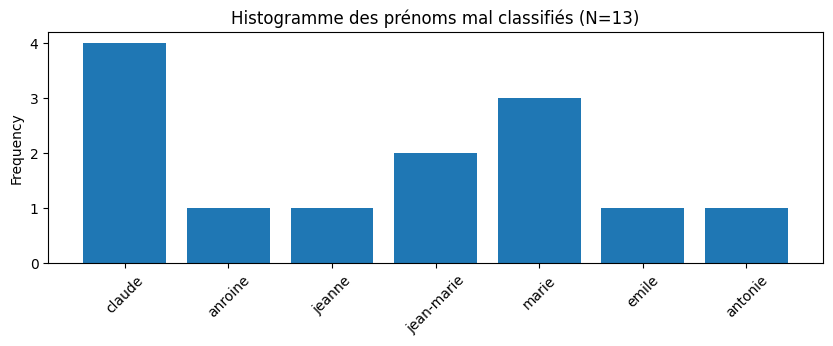

In [14]:
def makeErrorHistogram(error_dict: dict):
    n_error = sum(error_dict.values())
    fig = plt.figure(figsize=(10,3))
    plt.bar(error_dict.keys(), error_dict.values())
    plt.title(f'Histogramme des prénoms mal classifiés (N={n_error})')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    return fig

fig = makeErrorHistogram(error_dict)
fig.show()
plt.savefig("erreur_histogramme.png", bbox_inches="tight")

